In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
 # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [8]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1380\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 12s 6s/step - loss: 7.9270 - accuracy: 0.3281 - val_loss: 8.0771 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 8s 5s/step - loss: 4.6206 - accuracy: 0.3750 - val_loss: 7.1867 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 8s 5s/step - loss: 5.8748 - accuracy: 0.3125 - val_loss: 4.0110 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 8s 6s/step - loss: 3.5281 - accuracy: 0.3438 - val_loss: 1.4734 - val_accuracy: 0.3448
Epoch 5/50
2/2 [==============================] - 8s 6s/step - loss: 1.9639 - accuracy: 0.4062 - val_loss: 3.5831 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 8s 6s/step - loss: 2.5858 - accuracy: 0.4062 - val_loss: 3.7151 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 8s 6s/step - loss: 1.5922 - accuracy: 0.5000 - val_loss: 1.5501 - val_accuracy: 0.5862
Epoch 8/50
2/2 [========================

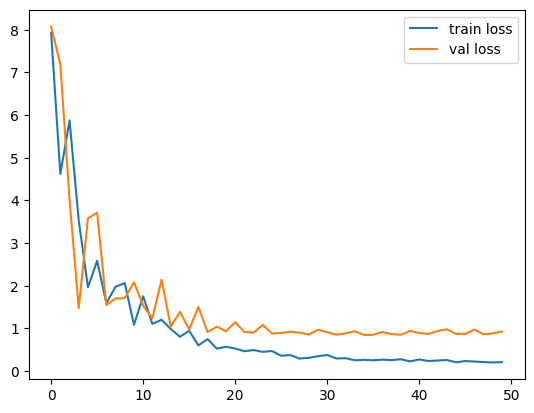

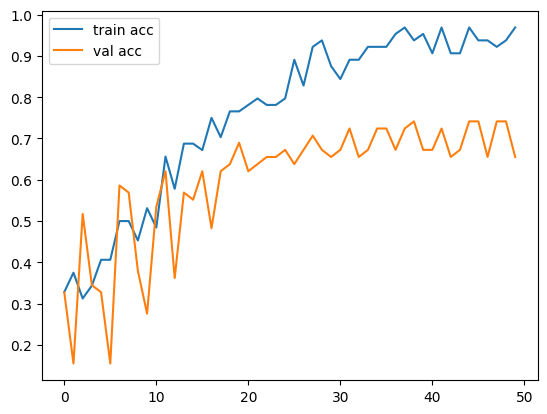

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [19]:
y_pred = model.predict(test_set)

2/2 [==============================] - 4s 2s/step


In [20]:
y_pred

array([[7.4628512e-03, 9.0165967e-01, 9.0877391e-02],
       [1.1899152e-02, 9.8635590e-01, 1.7449736e-03],
       [3.9507761e-03, 9.0262318e-01, 9.3426019e-02],
       [1.7955083e-02, 8.3118435e-03, 9.7373307e-01],
       [1.4375308e-02, 4.5298678e-01, 5.3263783e-01],
       [2.0814262e-02, 8.9264423e-01, 8.6541459e-02],
       [3.6813616e-04, 9.5893675e-01, 4.0695153e-02],
       [2.5084367e-01, 4.5033727e-02, 7.0412260e-01],
       [4.3162871e-02, 6.2350746e-02, 8.9448643e-01],
       [1.8099932e-02, 3.7202489e-01, 6.0987514e-01],
       [1.4600980e-02, 4.0326999e-03, 9.8136628e-01],
       [1.6158079e-01, 3.5981575e-01, 4.7860345e-01],
       [1.0279566e-01, 3.7016526e-01, 5.2703917e-01],
       [6.3440039e-06, 9.1966118e-05, 9.9990165e-01],
       [3.5969797e-01, 2.7162537e-01, 3.6867675e-01],
       [3.7425235e-02, 3.6932096e-01, 5.9325373e-01],
       [2.2395480e-02, 9.3745911e-01, 4.0145475e-02],
       [1.9172974e-02, 5.4899150e-01, 4.3183553e-01],
       [1.3213570e-01, 5.304

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0,
       1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

In [30]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

In [34]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [35]:
x.shape

(224, 224, 3)

In [36]:
x=x/255

In [37]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
img_data

array([[[[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         ...,
         [-103.939   , -116.77116 , -123.62902 ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.74763 , -123.60941 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.743706, -123.60549 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        ...,

        [[-103.57822 , -116.27312 , -1

In [39]:
model.predict(img_data)

1/1 [==============================] - 1s 937ms/step


array([[0.0646733 , 0.03631601, 0.8990107 ]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 111ms/step


In [41]:
a

array([2], dtype=int64)